Starting robust experiment with 5 runs per length...

=== Testing Sequence Length: 3 ===
Training on device: cpu
Start Training...
Step 0, Loss: 2.3109, Accuracy: 0.1484
Step 100, Loss: 0.0046, Accuracy: 1.0000
Step 200, Loss: 0.0014, Accuracy: 1.0000
Step 300, Loss: 0.0006, Accuracy: 1.0000
Step 400, Loss: 0.0003, Accuracy: 1.0000
Step 500, Loss: 0.0002, Accuracy: 1.0000
Step 600, Loss: 0.0001, Accuracy: 1.0000
Step 700, Loss: 0.0001, Accuracy: 1.0000
Step 800, Loss: 0.0000, Accuracy: 1.0000
Step 900, Loss: 0.0000, Accuracy: 1.0000
Step 1000, Loss: 0.0000, Accuracy: 1.0000
Step 1100, Loss: 0.0000, Accuracy: 1.0000
Step 1200, Loss: 0.0000, Accuracy: 1.0000
Step 1300, Loss: 0.0000, Accuracy: 1.0000
Step 1400, Loss: 0.0000, Accuracy: 1.0000
Step 1500, Loss: 0.0000, Accuracy: 1.0000
Step 1600, Loss: 0.0000, Accuracy: 1.0000
Step 1700, Loss: 0.0000, Accuracy: 1.0000
Step 1800, Loss: 0.0000, Accuracy: 1.0000
Step 1900, Loss: 0.0000, Accuracy: 1.0000
Step 2000, Loss: 0.0000, Accuracy: 1.0000

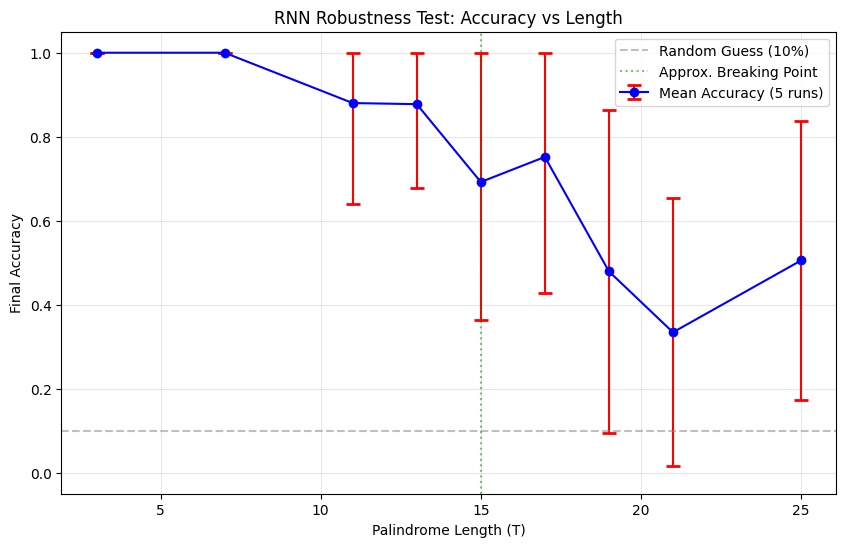

In [ ]:
# Cell 1: Setup & Imports
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
current_dir = os.path.abspath('')
if current_dir not in sys.path:
    sys.path.append(current_dir)

from train import train

class Config:
    def __init__(self, input_length):
        self.input_length = input_length
        self.input_dim = 1 
        self.num_classes = 10
        self.num_hidden = 128
        self.batch_size = 128
        self.learning_rate = 0.001
        self.train_steps = 3000 
        self.max_norm = 10.0

lengths_to_test = [3, 7, 11, 13, 15, 17, 19, 21, 25]
runs_per_length = 5 
max_steps = 2000

mean_accuracies = []
std_accuracies = []

print(f"Starting robust experiment with {runs_per_length} runs per length...")

for length in lengths_to_test:
    print(f"\n=== Testing Sequence Length: {length} ===")
    current_accs = []
    
    for run in range(runs_per_length):
        steps = max_steps
        
        cfg = Config(input_length=length)
        cfg.train_steps = steps
        
        _, accs, _ = train(cfg)
        
        final_acc = np.mean(accs[-100:])
        current_accs.append(final_acc)
        print(f"  Run {run+1}: {final_acc:.4f}")
    
    avg = np.mean(current_accs)
    std = np.std(current_accs)
    
    mean_accuracies.append(avg)
    std_accuracies.append(std)
    print(f"-> Avg: {avg:.4f} | Std: {std:.4f}")

means = np.array(mean_accuracies)
stds = np.array(std_accuracies)

lower_error = stds
upper_error = np.minimum(stds, 1.0 - means)

asymmetric_error = [lower_error, upper_error]

plt.figure(figsize=(10, 6))

# 绘制带误差棒的折线
plt.errorbar(lengths_to_test, means, yerr=asymmetric_error, 
             fmt='-o', capsize=5, capthick=2, ecolor='red', color='blue', 
             label=f'Mean Accuracy ({runs_per_length} runs)')

plt.axhline(y=0.1, color='gray', linestyle='--', alpha=0.5, label='Random Guess (10%)')
plt.axvline(x=15, color='green', linestyle=':', alpha=0.5, label='Approx. Breaking Point')

plt.title('RNN Robustness Test: Accuracy vs Length')
plt.xlabel('Palindrome Length (T)')
plt.ylabel('Final Accuracy')
plt.ylim(-0.05, 1.05)
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()